In [22]:
import time

import awkward as ak
import hist
import matplotlib.pyplot as plt
import numpy as np
from coffea import processor

# The opendata files are non-standard NanoAOD, so some optional data columns are missing
#processor.NanoAODSchema.warn_missing_crossrefs = False


def run(query, chunksize=2**19, workers=24):
    tic = time.monotonic()
    output, metrics = processor.run_uproot_job(
        fileset={"WPLEPWMHADjj": ["WPLEPWMHADjj_4f_EWK_UL2018-NANOAODSIMv9.root"]},
        treename="Events",
        processor_instance=query(),
        executor=processor.futures_executor,
        executor_args={
            "workers": workers,
            "schema": processor.NanoAODSchema,
            "savemetrics": True,
            "status": False,
        },
        chunksize=chunksize,
    )
    toc = time.monotonic()
    metrics["query"] = query.__name__
    metrics["chunksize"] = chunksize
    metrics["workers"] = workers
    metrics["walltime"] = toc - tic
    return output, metrics

Plot the MET of all events

{'bytesread': 58147,
 'columns': ['MET_pt'],
 'entries': 500,
 'processtime': 0.024514198303222656,
 'chunks': 1,
 'query': 'Q1Processor',
 'chunksize': 524288,
 'workers': 24,
 'walltime': 2.8331981729716063}

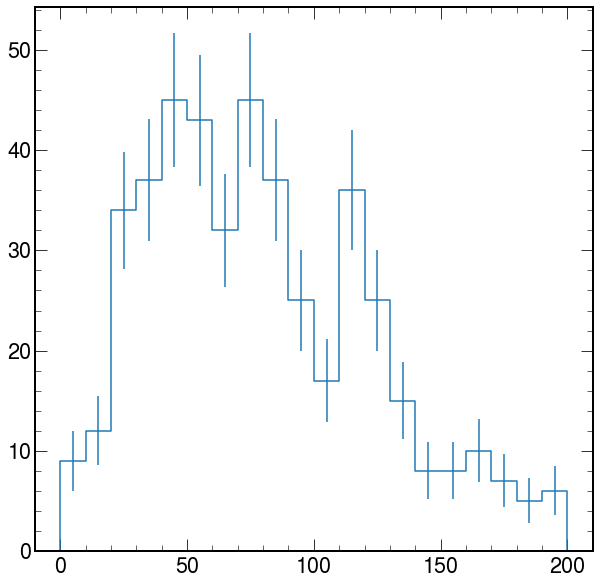

In [25]:
class Q1Processor(processor.ProcessorABC):
    def process(self, events):
        return (
            hist.Hist.new.Reg(20, 0, 200, name="met", label="$E_{T}^{miss}$ [GeV]")
            .Double()
            .fill(events.MET.pt)
        )

    def postprocess(self, accumulator):
        return accumulator


out, metrics = run(Q1Processor)
out.plot1d()
metrics

In [16]:
#import awkward as ak
#import uproot
from matplotlib import pyplot as plt
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

fname='WPLEPWMHADjj_4f_EWK_UL2018-NANOAODSIMv9.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()